In [8]:
import numpy as np
import pandas as pd
from statsmodels.miscmodels.ordinal_model import OrderedModel
import seaborn as sns

In [92]:
df = pd.read_stata('ologit.dta')

In [3]:
df.head()

,apply,pared,public,gpa
0,very likely,0,0,3.26
1,somewhat likely,1,0,3.21
2,unlikely,1,1,3.94
3,somewhat likely,0,0,2.81
4,somewhat likely,0,0,2.53


<AxesSubplot:xlabel='apply', ylabel='count'>

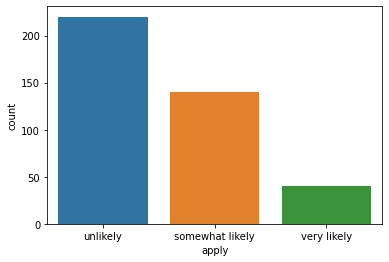

In [10]:
sns.countplot(df['apply'])

In [11]:
df.columns

Index(['apply', 'pared', 'public', 'gpa'], dtype='object')

sns.catplot('gpa','pared',data=df,kind='swarm')

/home/eshaan/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='apply', ylabel='pared'>

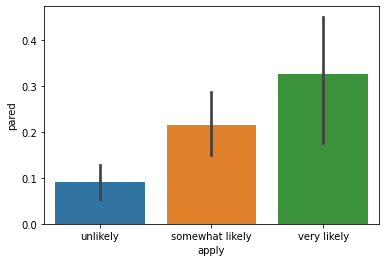

In [16]:
sns.barplot('apply','pared',data=df)

/home/eshaan/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='apply', ylabel='pared'>

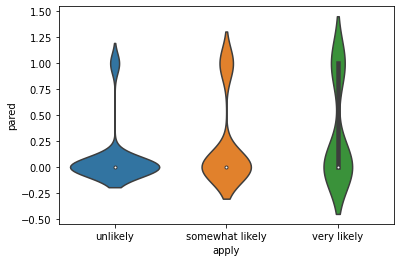

In [23]:
sns.violinplot('apply','pared',data=df)

In [24]:
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.preprocessing import LabelEncoder

In [29]:
df['apply'] = LabelEncoder().fit_transform(df['apply'])

In [54]:
df.head(3)

,apply,pared,public,gpa
0,2,0,0,3.26
1,0,1,0,3.21
2,1,1,1,3.94


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   apply   400 non-null    int64  
 1   pared   400 non-null    int8   
 2   public  400 non-null    int8   
 3   gpa     400 non-null    float32
dtypes: float32(1), int64(1), int8(2)
memory usage: 24.8 KB


In [95]:
x = df.iloc[:,1:]

In [96]:
y = df.iloc[:,0]

In [97]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [59]:
len(np.array(x_train).ravel())

960

In [61]:
len(np.array(y_train).ravel())

320

In [78]:
model = OrderedModel(y_train,x_train,distr='logit')

model = OrderedModel.from_formula("apply~pared+public+gpa",df,distr="logit")

In [79]:
model = model.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: 0.907987
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24


In [80]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                  apply   Log-Likelihood:                -290.56
Model:                   OrderedModel   AIC:                             591.1
Method:            Maximum Likelihood   BIC:                             610.0
Date:                Thu, 10 Mar 2022                                         
Time:                        10:55:56                                         
No. Observations:                 320                                         
Df Residuals:                     315                                         
Df Model:                           5                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pared         -0.4819      0.333     -1.449      0.147      -1.134       0.170
public         0.7509      0.336      2.236      0.025       0.093       1.409
gpa            0.0464      0.293      0.158      0.874      -0.528       0.621
0/1           -0.5236      0.864     -0.606      0.545      -2.218       1.171
1/2            1.0774      0.068     15.786      0.000       0.944       1.211
==============================================================================
"""

In [81]:
pred = model.predict(x_test)

In [83]:
pred

,0,1,2
279,0.342619,0.565034,0.092348
383,0.447097,0.491362,0.061541
276,0.336169,0.569044,0.094787
22,0.345971,0.562919,0.091111
125,0.340323,0.566470,0.093207
...,...,...,...
371,0.336272,0.568980,0.094748
247,0.342410,0.565165,0.092425
180,0.336272,0.568980,0.094748
295,0.341887,0.565492,0.092620


In [84]:
from sklearn.metrics import accuracy_score

In [87]:
class_p = []
for i in range(len(pred)):
    if max(pred.iloc[i,0],pred.iloc[i,1],pred.iloc[i,2]) == pred.iloc[i,0]:
        class_p.append('unlikely')
    elif max(pred.iloc[i,0],pred.iloc[i,1],pred.iloc[i,2]) == pred.iloc[i,1]:
        class_p.append('somewhat likely')
    elif max(pred.iloc[i,0],pred.iloc[i,1],pred.iloc[i,2]) == pred.iloc[i,2]:
        class_p.append('very likely')

In [92]:
df = pd.read_stata('ologit.dta')

In [86]:
pred = model.predict(df.drop('apply',axis=1))

In [93]:
accuracy_score(df['apply'],class_p)

0.35

In [92]:
df = pd.read_stata('ologit.dta')

In [95]:
x = df.iloc[:,1:]

In [96]:
y = df.iloc[:,0]

In [97]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
mod_tree = DecisionTreeClassifier(criterion='entropy').fit(x_train,y_train)

In [104]:
pred_tree = mod_tree.predict(x_test)

In [105]:
accuracy_score(y_test,pred_tree)

0.5

In [106]:
from graphviz import Source
from IPython.display import display, SVG

In [107]:
from sklearn import tree

In [108]:
graph = Source(tree.export_graphviz(mod_tree,filled=1))

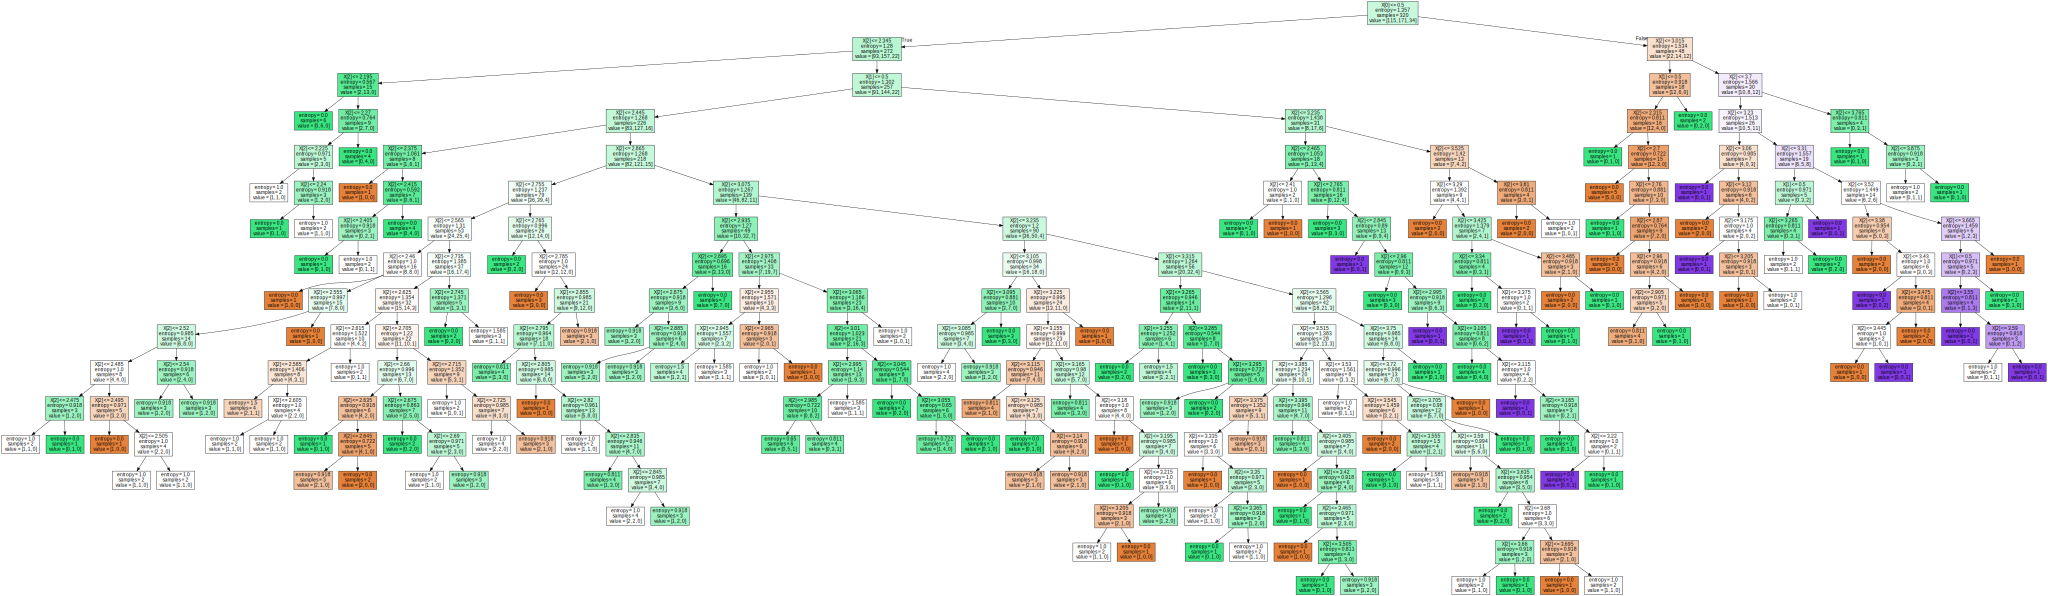

In [109]:
graph